# Train the Model



In [4]:
import torch
import torchvision
import ultralytics
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import matplotlib.image as mpimg

## Check the Cuda is Working and Type of the Device

In [2]:
if torch.cuda.is_available():
    device = 'cuda'
    print("Using CUDA")
    print(f"Device: {torch.cuda.get_device_name(0)}")
else:
    device = 'cpu'
    print("Using CPU")


Using CUDA
Device: NVIDIA GeForce RTX 3060 Laptop GPU


## Train the Model

In [ ]:
model=YOLO('yolo11n.pt')  # Load a pre-trained YOLOv11 model
model.train(
    data='data/dataset.yaml',  # Path to the dataset YAML file
    epochs=10,  # Number of training epochs
    imgsz=640,  # Image size for training
    batch=16,  # Batch size
    device=device,  # Device to use for training (CPU or GPU)
    project='runs/train',  # Directory to save training results
    name='yolov11n_leaf_detection',
    workers=4,
    patience=10  # Name of the training run
)

New https://pypi.org/project/ultralytics/8.3.171 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.170  Python-3.13.5 torch-2.7.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov11n_leaf_detection7, nbs=64, nms=False

train: Scanning E:\LeafDetection\data\train\labels.cache... 904 images, 0 backgrounds, 0 corrupt: 100%|██████████| 904/904 [00:00<?, ?it/s]


val: Fast image access  (ping: 0.20.1 ms, read: 35.642.3 MB/s, size: 434.1 KB)


val: Scanning E:\LeafDetection\data\val\labels.cache... 268 images, 0 backgrounds, 0 corrupt: 100%|██████████| 268/268 [00:00<?, ?it/s]


Plotting labels to runs\train\yolov11n_leaf_detection7\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs\train\yolov11n_leaf_detection7
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.9G      1.368      2.333      1.548         37        640: 100%|██████████| 57/57 [00:26<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        268       1273      0.529      0.273      0.323      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.22G      1.441      1.888      1.567         23        640: 100%|██████████| 57/57 [00:33<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        268       1273      0.385      0.436      0.349      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.34G      1.443      1.841       1.58         93        640:  75%|███████▌  | 43/57 [00:26<00:08,  1.66it/s]

### Confusion Matrix

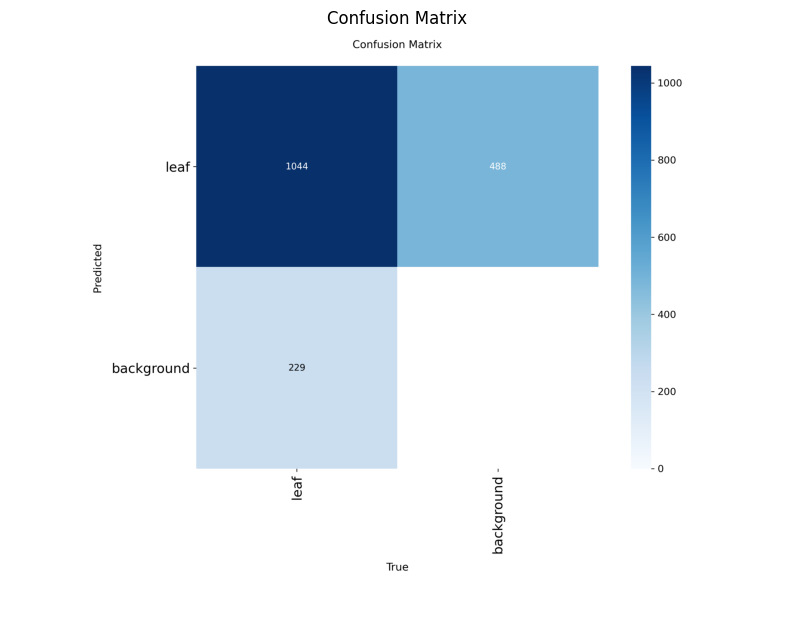

In [5]:
matrix_path = 'runs/train/yolov11n_leaf_detection4/confusion_matrix.png'
if os.path.exists(matrix_path):
    confusion_matrix = mpimg.imread(matrix_path)
    plt.figure(figsize=(10, 10))
    plt.imshow(confusion_matrix)
    plt.axis('off')
    plt.title('Confusion Matrix')
    plt.show()

### Box Curves

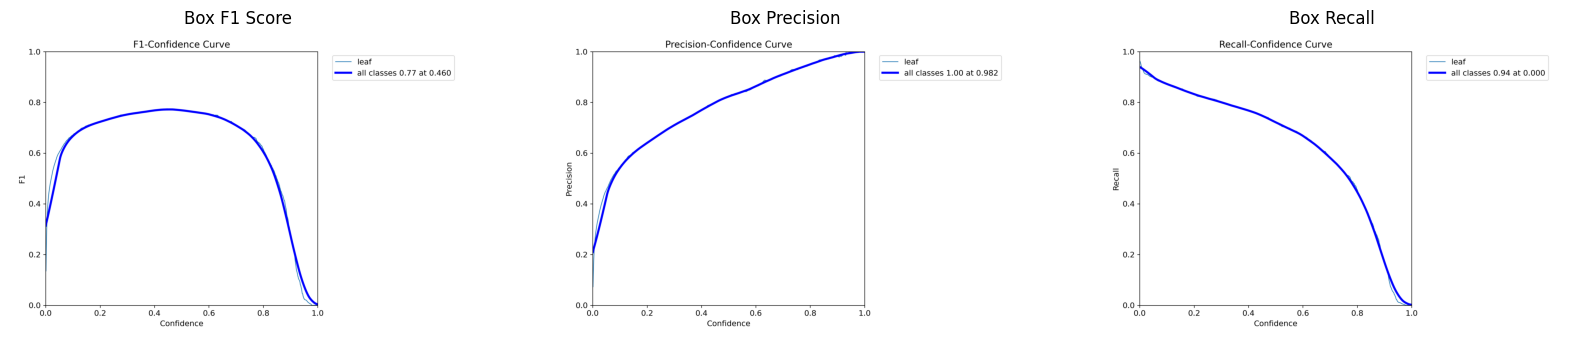

In [9]:
boxf1_path = 'runs/train/yolov11n_leaf_detection4/BoxF1_curve.png'
boxp_path = 'runs/train/yolov11n_leaf_detection4/BoxP_curve.png'
boxr_path = 'runs/train/yolov11n_leaf_detection4/BoxR_curve.png'

plt.figure(figsize=(20, 20))
plt.subplot(1, 3, 1)
if os.path.exists(boxf1_path):
    box_f1 = mpimg.imread(boxf1_path)
    plt.imshow(box_f1)
    plt.title('Box F1 Score')
    plt.axis('off')
plt.subplot(1, 3, 2)
if os.path.exists(boxp_path):
    box_p = mpimg.imread(boxp_path)
    plt.imshow(box_p)
    plt.title('Box Precision')
    plt.axis('off')
plt.subplot(1, 3, 3)
if os.path.exists(boxr_path):
    box_r = mpimg.imread(boxr_path)
    plt.imshow(box_r)
    plt.title('Box Recall')
    plt.axis('off')

#### result

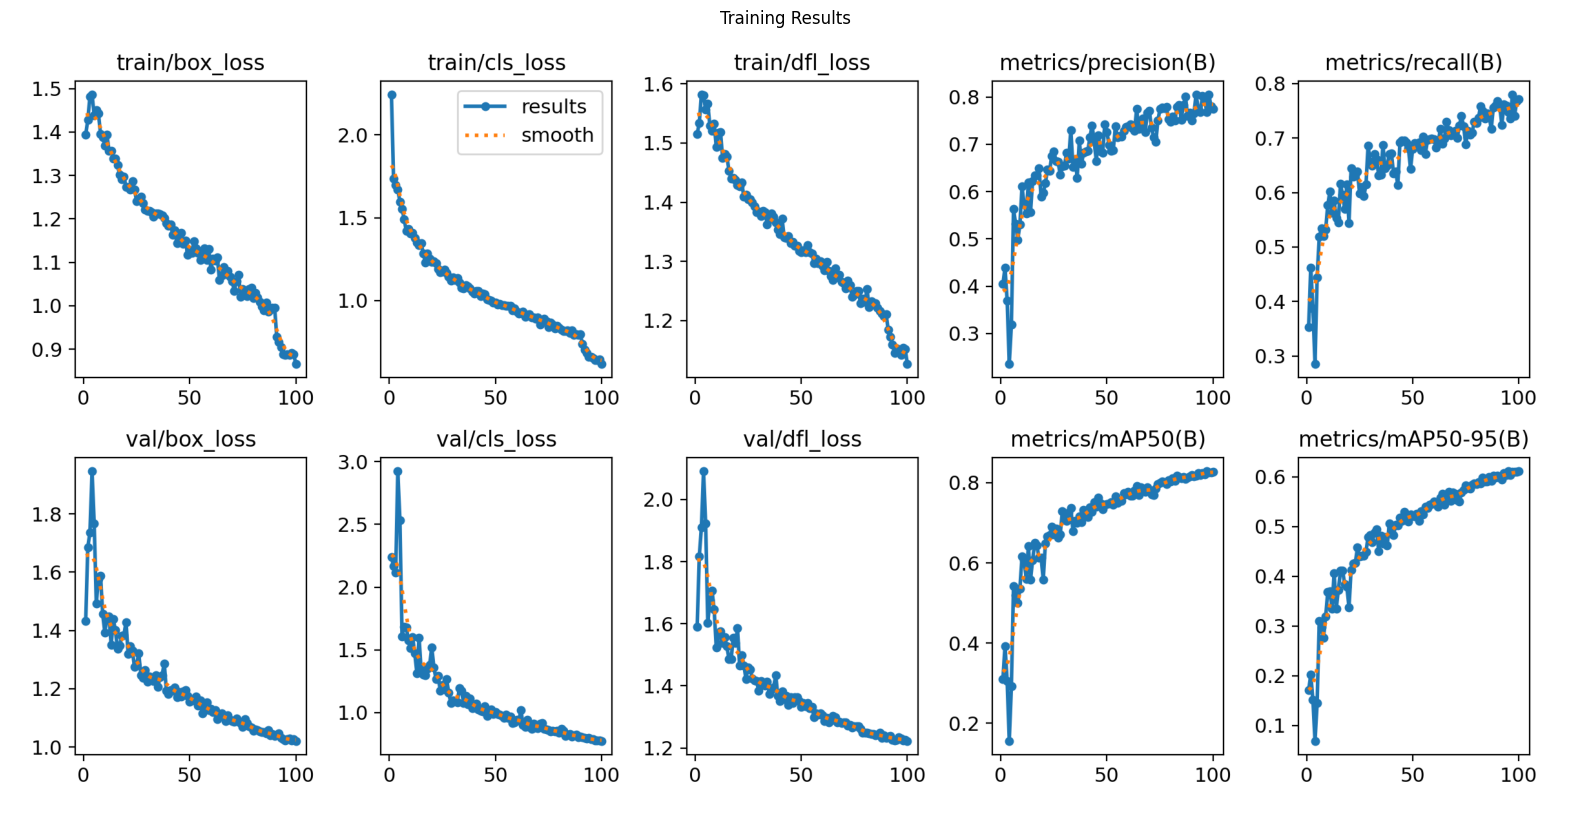

In [11]:
result_path = 'runs/train/yolov11n_leaf_detection4/results.png'
if os.path.exists(result_path):
    result_image = mpimg.imread(result_path)
    plt.figure(figsize=(20, 20))
    plt.imshow(result_image)
    plt.axis('off')
    plt.title('Training Results')
    plt.show()

### Validate Images Leaf Detection

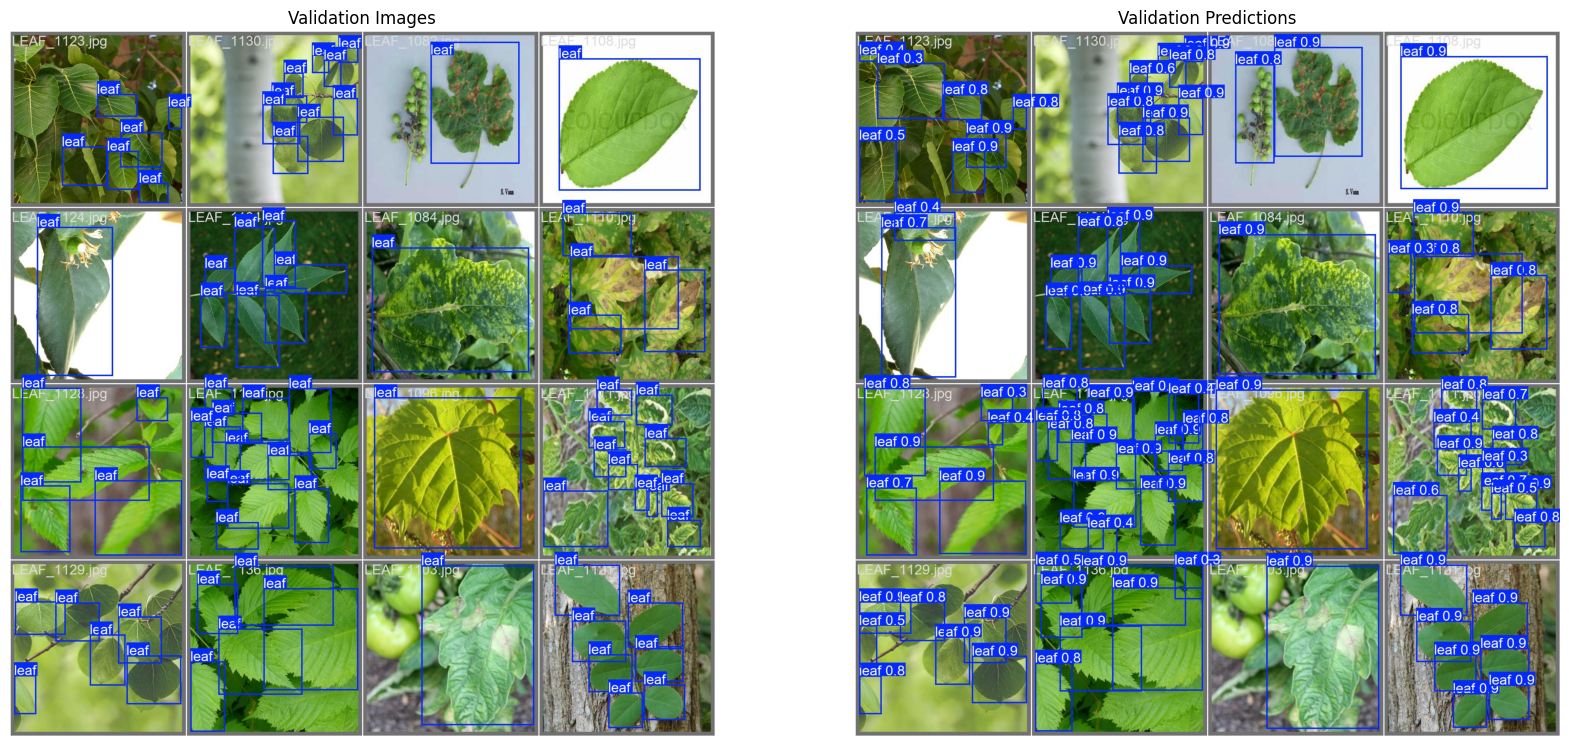

In [13]:
val_images_path = 'runs/train/yolov11n_leaf_detection4/val_batch0_labels.jpg'
val_img_pred_path = 'runs/train/yolov11n_leaf_detection4/val_batch0_pred.jpg'
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
if os.path.exists(val_images_path):
    val_images = mpimg.imread(val_images_path)
    plt.imshow(val_images)
    plt.axis('off')
    plt.title('Validation Images')
plt.subplot(1, 2, 2)
if os.path.exists(val_img_pred_path):
    val_img_pred = mpimg.imread(val_img_pred_path)
    plt.imshow(val_img_pred)
    plt.axis('off')
    plt.title('Validation Predictions')
plt.show()
